## CoreCoil LVDT function Simulation

In [1]:
import femm
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt


In [46]:
# The package must be initialized with the openfemm command.
femm.openfemm()
# We need to create a new Magnetostatics document to work on.
femm.newdocument(0)

In [6]:
# geometry of core coil (CC)
CC_wire_type         = "100um"
CC_wire_diameter     = 0.1 # mm
CC_wire_insulation   = 0 # mm
CC_wire_layer        = 8      # number of layers
CC_length            = 12     # mm
CC_inner_diameter    = 12     # mm 
CC_outer_diameter    = 0      # mm  

CC_outer_diameter= CC_inner_diameter + 2 * CC_wire_layer * (CC_wire_diameter + CC_wire_insulation * 2)
CC_upp_pos =  CC_length / 2
CC_low_pos = -CC_length / 2
CC_turns_per_layer = CC_length / (CC_wire_diameter + CC_wire_insulation * 2)
CC_turns = CC_turns_per_layer * CC_wire_layer

print(  "\nCC_inner_diameter: = {:.2f} mm".format(CC_inner_diameter),
        "\nCC_outer_diameter: = {:.2f} mm".format(CC_outer_diameter),      
        "\nCC_upp_pos: = {:.2f} mm".format(CC_upp_pos),
        "\nCC_low_pos: = {:.2f} mm".format(CC_low_pos),
        "\nCC_turns_per_layer: = {:.2f}".format(CC_turns_per_layer),
        "\nCC_turns: = {:.2f}".format(CC_turns))


CC_inner_diameter: = 12.00 mm 
CC_outer_diameter: = 13.60 mm 
CC_upp_pos: = 6.00 mm 
CC_low_pos: = -6.00 mm 
CC_turns_per_layer: = 120.00 
CC_turns: = 960.00


### Main parameters

In [2]:
# - parameters of the coils
#     - Outercoils (OC): 2 coils
#     - Middlecoil (MC): 1 coil
#     - Corecoil   (CC): 1 coil
#     - Magnet      (M): 1 magnet

# geometry of outer coils (OC): include upper and lower coils
OC_wire_type         = "100um"
OC_wire_diameter     = 0.1 # mm
OC_wire_insulation   = 0 # mm
OC_wire_layer        = 16     # number of layers
OC_length            = 3      # mm
OC_inner_diameter    = 18     # mm
OC_outer_diameter    = 0      # mm (predefined as 0, need to be calculated)

# geometry of middle coil (MC)
MC_wire_type         = "100um"
MC_wire_diameter     = 0.1 # mm
MC_wire_insulation   = 0 # mm
MC_wire_layer        = 16     # number of layers
MC_length            = 3      # mm
MC_inner_diameter    = 18     # mm
MC_outer_diameter    = 0      # mm (predefined as 0, need to be calculated)

# geometry of core coil (CC)
CC_wire_type         = "100um"
CC_wire_diameter     = 0.1 # mm
CC_wire_insulation   = 0 # mm
CC_wire_layer        = 8      # number of layers
CC_length            = 12     # mm
CC_inner_diameter    = 10     # mm 
CC_outer_diameter    = 0      # mm      

# geometry of alu core (AluC)
AluC_inner_diameter   = 10     # mm
AluC_outer_diameter   = 14     # mm
# Alu_diameter          = 10      # mm
AluC_length           = 12     # mm
AluC_material         = "Aluminum, 6061-T6"

# geometry of magnet
# M_inner_diameter     = 10 # mm
# M_outer_diameter     = 12 # mm
M_diameter           = 5 # mm
M_length             = 10 # mm
M_material           = "N40"
M_vert_shift         = 0

# geometry of bobbin
OC_distance          = 16     # mm   
CC_offset_distance   = 0      # mm

# electrical properties
CC_current          = 0       # A  
OC_current          = 0       # A  
MC_current          = 1       # A  
frequency           = 0       # Hz 

input_signal = {
'AC':     {'current': 1, 'frequency': 10000,},
'DC':     {'current': 1,    'frequency': 0,},
'OFF':    {'current': 0,    'frequency': 0,}
}

# define the problem type 
# precisions of 10^-10 for the solver
# femm.mi_probdef(input_signal['AC']['frequency'], "millimeters", "axi", 1.e-10)

### femm geometry calculations


In [3]:
# femm geometry of OC: 2 coils

OC_outer_diameter = OC_inner_diameter +  2 * OC_wire_layer * (OC_wire_diameter + OC_wire_insulation * 2)
OC_upp_pos = (OC_distance + OC_length) / 2
OC_low_pos = (OC_distance - OC_length) / 2
OC_turns_per_layer = OC_length / (OC_wire_diameter + OC_wire_insulation * 2)
OC_turns = OC_turns_per_layer * OC_wire_layer

print(  "\nOC_inner_diameter: = {:.2f} mm".format(OC_inner_diameter),
        "\nOC_outer_diameter: = {:.2f} mm".format(OC_outer_diameter),      
        "\nOC_upp_pos: = {:.2f} mm".format(OC_upp_pos),
        "\nOC_low_pos: = {:.2f} mm".format(OC_low_pos),
        "\nOC_turns_per_layer: = {:.2f}".format(OC_turns_per_layer),
        "\nOC_turns: = {:.2f}".format(OC_turns))

# femm geometry of MC: 1 coil

MC_outer_diameter = MC_inner_diameter + 2 * MC_wire_layer * (MC_wire_diameter + MC_wire_insulation * 2)
MC_upp_pos =  MC_length / 2
MC_low_pos = -MC_length / 2
MC_turns_per_layer = MC_length / (MC_wire_diameter + MC_wire_insulation * 2)
MC_turns = MC_turns_per_layer * MC_wire_layer

print(  "\nMC_inner_diameter: = {:.2f} mm".format(MC_inner_diameter),
        "\nMC_outer_diameter: = {:.2f} mm".format(MC_outer_diameter),      
        "\nMC_upp_pos: = {:.2f} mm".format(MC_upp_pos),
        "\nMC_low_pos: = {:.2f} mm".format(MC_low_pos),
        "\nMC_turns_per_layer: = {:.2f}".format(MC_turns_per_layer),
        "\nMC_turns: = {:.2f}".format(MC_turns))

# femm geometry of CC: 1 coil

CC_outer_diameter= CC_inner_diameter + 2 * MC_wire_layer * (MC_wire_diameter + MC_wire_insulation * 2)
CC_upp_pos =  CC_length / 2
CC_low_pos = -CC_length / 2
CC_turns_per_layer = CC_length / (CC_wire_diameter + CC_wire_insulation * 2)
CC_turns = CC_turns_per_layer * CC_wire_layer

print(  "\nCC_inner_diameter: = {:.2f} mm".format(CC_inner_diameter),
        "\nCC_outer_diameter: = {:.2f} mm".format(CC_outer_diameter),      
        "\nCC_upp_pos: = {:.2f} mm".format(CC_upp_pos),
        "\nCC_low_pos: = {:.2f} mm".format(CC_low_pos),
        "\nCC_turns_per_layer: = {:.2f}".format(CC_turns_per_layer),
        "\nCC_turns: = {:.2f}".format(CC_turns))

# femm geometry of magnet
M_upp_pos =  M_length / 2 + M_vert_shift
M_low_pos = -M_length / 2 + M_vert_shift

print(  "\nM_upp_pos: = {:.2f} mm".format(M_upp_pos),
        "\nM_low_pos: = {:.2f} mm".format(M_low_pos))

# femm geometry of AluC
AluC_upp_pos =  AluC_length / 2
AluC_low_pos = -AluC_length / 2


print(  "\nAluC_length: = {:.2f} mm".format(AluC_length),
        "\nAluC_upp_pos: = {:.2f} mm".format(AluC_upp_pos),
        "\nAluC_low_pos: = {:.2f} mm".format(AluC_low_pos))



OC_inner_diameter: = 18.00 mm 
OC_outer_diameter: = 21.20 mm 
OC_upp_pos: = 9.50 mm 
OC_low_pos: = 6.50 mm 
OC_turns_per_layer: = 30.00 
OC_turns: = 480.00

MC_inner_diameter: = 18.00 mm 
MC_outer_diameter: = 21.20 mm 
MC_upp_pos: = 1.50 mm 
MC_low_pos: = -1.50 mm 
MC_turns_per_layer: = 30.00 
MC_turns: = 480.00

CC_inner_diameter: = 10.00 mm 
CC_outer_diameter: = 13.20 mm 
CC_upp_pos: = 6.00 mm 
CC_low_pos: = -6.00 mm 
CC_turns_per_layer: = 120.00 
CC_turns: = 960.00

M_upp_pos: = 5.00 mm 
M_low_pos: = -5.00 mm

AluC_length: = 12.00 mm 
AluC_upp_pos: = 6.00 mm 
AluC_low_pos: = -6.00 mm


### Build Geometry

In [40]:
# define for the circuit
OC_upp_circuit = "outercoil_upper"
OC_low_circuit = "outercoil_lower"
MC_circuit = "middlecoil"
# CC_circuit = "corecoil"

OC_upp_prop =[OC_upp_circuit, input_signal['AC']['current'], 1]
OC_low_prop =[OC_low_circuit, -input_signal['AC']['current'], 1]
MC_prop =[MC_circuit, input_signal['OFF']['current'], 1]
# CC_prop =[CC_circuit, input_signal['OFF']['current'], 1]


# AluC geometry it got inner diameter and outerdiamter
femm.mi_drawrectangle(AluC_inner_diameter / 2, AluC_low_pos, AluC_outer_diameter / 2, AluC_upp_pos)
femm.mi_getmaterial(AluC_material)
femm.mi_clearselected()
femm.mi_selectrectangle(AluC_inner_diameter / 2, AluC_low_pos, AluC_outer_diameter / 2, AluC_upp_pos, 4)
femm.mi_setgroup(1)
femm.mi_addblocklabel(AluC_inner_diameter / 2 + (AluC_outer_diameter - AluC_inner_diameter) / 4, (AluC_upp_pos + AluC_low_pos) / 2)
femm.mi_selectlabel(AluC_inner_diameter / 2 + (AluC_outer_diameter - AluC_inner_diameter) / 4, (AluC_upp_pos + AluC_low_pos) / 2)
femm.mi_setblockprop(AluC_material, 0, 0.1, "", 0, 1, 0)
femm.mi_clearselected()

# Magnet geometry with a solid bar
femm.mi_drawrectangle(0, M_low_pos, M_diameter / 2, M_upp_pos)
femm.mi_getmaterial(M_material)
femm.mi_clearselected()
femm.mi_selectrectangle(0, M_low_pos, M_diameter / 2, M_upp_pos, 4)
femm.mi_setgroup(2)
femm.mi_addblocklabel(M_diameter / 4, (M_upp_pos + M_low_pos) / 2)
femm.mi_selectlabel(M_diameter / 4, (M_upp_pos + M_low_pos) / 2)
femm.mi_setblockprop(M_material, 0, 0.1, "", 90, 2, 0)
femm.mi_clearselected()

# Middle coil geometry
femm.mi_drawrectangle(MC_inner_diameter / 2, MC_low_pos, MC_outer_diameter / 2, MC_upp_pos)
femm.mi_addcircprop(MC_prop[0], MC_prop[1], MC_prop[2])
femm.mi_addmaterial('100um', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.1)
femm.mi_clearselected()
femm.mi_selectrectangle(MC_inner_diameter / 2, MC_low_pos, MC_outer_diameter / 2, MC_upp_pos, 4)
femm.mi_setgroup(3)
femm.mi_clearselected()
femm.mi_addblocklabel(MC_inner_diameter / 2 + (MC_outer_diameter - MC_inner_diameter) / 4, (MC_upp_pos + MC_low_pos) / 2)
femm.mi_selectlabel(MC_inner_diameter / 2 + (MC_outer_diameter - MC_inner_diameter) / 4, (MC_upp_pos + MC_low_pos) / 2)
femm.mi_setblockprop(MC_wire_type, 0, 0.1, MC_circuit, 0, 3, MC_turns)
femm.mi_clearselected()

# Outer coils geometry
# OC_upper
femm.mi_drawrectangle(OC_inner_diameter / 2, OC_low_pos, OC_outer_diameter / 2, OC_upp_pos)
femm.mi_addcircprop(OC_upp_prop[0], OC_upp_prop[1], OC_upp_prop[2])
femm.mi_clearselected()
femm.mi_selectrectangle(OC_inner_diameter / 2, OC_low_pos, OC_outer_diameter / 2, OC_upp_pos, 4)
femm.mi_setgroup(4)
femm.mi_clearselected()
femm.mi_addblocklabel(OC_inner_diameter / 2 + (OC_outer_diameter - OC_inner_diameter) / 4, (OC_upp_pos + OC_low_pos) / 2)
femm.mi_selectlabel(OC_inner_diameter / 2 + (OC_outer_diameter - OC_inner_diameter) / 4, (OC_upp_pos + OC_low_pos) / 2)
femm.mi_addmaterial('100um', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.1)
femm.mi_setblockprop(OC_wire_type, 0, 0.1, OC_upp_circuit, 0, 4, OC_turns)
femm.mi_clearselected()

# OC_lower
femm.mi_drawrectangle(OC_inner_diameter / 2, -OC_low_pos, OC_outer_diameter / 2, -OC_upp_pos)
femm.mi_addcircprop(OC_low_prop[0], OC_low_prop[1], OC_low_prop[2])
femm.mi_clearselected()
femm.mi_selectrectangle(OC_inner_diameter / 2, -OC_low_pos, OC_outer_diameter / 2, -OC_upp_pos, 4)
femm.mi_setgroup(5)
femm.mi_clearselected()
femm.mi_addblocklabel(OC_inner_diameter / 2 + (OC_outer_diameter - OC_inner_diameter) / 4, -(OC_upp_pos + OC_low_pos) / 2)
femm.mi_selectlabel(OC_inner_diameter / 2 + (OC_outer_diameter - OC_inner_diameter) / 4, -(OC_upp_pos + OC_low_pos) / 2)
femm.mi_addmaterial('100um', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.1)
femm.mi_setblockprop(OC_wire_type, 0, 0.1, OC_low_circuit, 0, 5, OC_turns)
femm.mi_clearselected()


# # Core coil geometry
# femm.mi_drawrectangle(CC_inner_diameter / 2, CC_low_pos, CC_outer_diameter / 2, CC_upp_pos)
# femm.mi_addcircprop(CC_circuit, input_signal['OFF']['current'], 1)
# femm.mi_addmaterial('100um', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.1)
# femm.mi_clearselected()
# femm.mi_selectrectangle(CC_inner_diameter / 2, CC_low_pos, CC_outer_diameter / 2, CC_upp_pos, 4)
# femm.mi_setgroup(4)
# femm.mi_clearselected()
# femm.mi_addblocklabel(CC_inner_diameter / 2 + (CC_outer_diameter - CC_inner_diameter) / 4,CC_upp_pos / 2)
# femm.mi_selectlabel(CC_inner_diameter / 2 + (CC_outer_diameter - CC_inner_diameter) / 4, CC_upp_pos  / 2)
# femm.mi_setblockprop(CC_wire_type, 0, 0.1, CC_circuit, 0, 4, CC_turns)
# femm.mi_clearselected()



# # Magnet geometry, it got inner diameter and outerdiamter
# femm.mi_drawrectangle(M_inner_diameter / 2, M_low_pos, M_outer_diameter / 2, M_upp_pos)
# femm.mi_getmaterial(M_material)
# femm.mi_clearselected()
# femm.mi_selectrectangle(M_inner_diameter / 2, M_low_pos, M_outer_diameter / 2, M_upp_pos, 4)
# femm.mi_setgroup(5)
# femm.mi_addblocklabel(M_inner_diameter / 2 + (M_outer_diameter - M_inner_diameter) / 4, (M_upp_pos + M_low_pos) / 2)
# femm.mi_selectlabel(M_inner_diameter / 2 + (M_outer_diameter - M_inner_diameter) / 4, (M_upp_pos + M_low_pos) / 2)
# femm.mi_setblockprop(M_material, 0, 0.1, "", 90, 5, 0)
# femm.mi_clearselected()

# #AluC geometry with a solid bar
# femm.mi_drawrectangle(0, AluC_low_pos, Alu_diameter / 2, AluC_upp_pos)
# femm.mi_getmaterial(AluC_material)
# femm.mi_clearselected()
# femm.mi_selectrectangle(0, AluC_low_pos, Alu_diameter / 2, AluC_upp_pos, 4)
# femm.mi_setgroup(6)
# femm.mi_addblocklabel(Alu_diameter / 4, (AluC_upp_pos + AluC_low_pos) / 2)
# femm.mi_selectlabel(Alu_diameter / 4, (AluC_upp_pos + AluC_low_pos) / 2)
# femm.mi_setblockprop(AluC_material, 0, 0.1, "", 0, 6, 0)
# femm.mi_clearselected()


# AirSurrounding Structure
AirSpaceRadius_1 = 100
AirSpaceRadius_2 = 300
BC_Name = "Outside"
BC_Group = 10
# Airspace1
femm.mi_drawline(0, AirSpaceRadius_1, 0, -AirSpaceRadius_1)
femm.mi_drawarc(0, -AirSpaceRadius_1, 0, AirSpaceRadius_1, 180, 2)
femm.mi_getmaterial("Air")       
femm.mi_clearselected()
femm.mi_addblocklabel(AirSpaceRadius_1/4, AirSpaceRadius_1/2)
femm.mi_selectlabel(  AirSpaceRadius_1/4, AirSpaceRadius_1/2)
femm.mi_setblockprop("Air", 0, 0.5, '', 0, 0, 0)
femm.mi_clearselected()
# Airspace2              
femm.mi_drawline(0, AirSpaceRadius_2, 0, -AirSpaceRadius_2)
femm.mi_drawarc(0, -AirSpaceRadius_2, 0, AirSpaceRadius_2, 180, 2)
femm.mi_getmaterial("Air")  
femm.mi_clearselected()
femm.mi_addblocklabel(AirSpaceRadius_2/2, AirSpaceRadius_2/1.2)
femm.mi_selectlabel(  AirSpaceRadius_2/2, AirSpaceRadius_2/1.2)
femm.mi_setblockprop("Air", 1, 0, '', 0, 0, 0)
femm.mi_clearselected()
# Boundary properties
femm.mi_addboundprop(BC_Name, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
femm.mi_clearselected()
femm.mi_selectarcsegment(0, AirSpaceRadius_2)
femm.mi_setarcsegmentprop(2, BC_Name, 0, BC_Group)               
femm.mi_clearselected()

### LVDT simulation loop

In [41]:
# physical properties
CC_init_position    = -10      # mm
CC_step_size        = 1       # mm
CC_steps            = 20    # number of steps

OC_upp_volt = np.zeros(CC_steps+1).astype(complex)
OC_low_volt = np.zeros(CC_steps+1).astype(complex)
MC_volt = np.zeros(CC_steps+1).astype(complex)
CC_volt = np.zeros(CC_steps+1).astype(complex)
CC_pos = np.zeros(CC_steps+1)

In [42]:
femm.mi_selectgroup(1)
femm.mi_selectgroup(2)
femm.mi_movetranslate(0, CC_init_position)
femm.mi_clearselected()

In [43]:
for i in range(0,CC_steps+1):

    print(CC_init_position + CC_step_size*i)
    CC_pos[i] = CC_init_position + CC_step_size*i

    # Now, the finished input geometry can be displayed.
    #femm.mi_zoomnatural()
    femm.mi_zoom(-2,-50,50,50)
    femm.mi_refreshview()

    # We have to give the geometry a name before we can analyze it.
    femm.mi_saveas('FEMM_Corecoil_LVDT_func.fem')

    # Now,analyze the problem and load the solution when the analysis is finished
    femm.mi_analyze()
    femm.mi_loadsolution()

    if CC_pos[i] == 0:
        # Show Density Plot:
        femm.mo_showdensityplot(1, 0.0001, 0.0001, 1.0E-9, "bmag")
                #--legend,	(0=hide, 1=show)
                #--gscale,	(0=color, 1=greyscale)
                #--upper_B,	(upperlimit for display)
                #--lower_B,	(lowerlimit for display)
                #--type		("bmag", "breal", "bimag" FluxDensity)
                #--			("hmag", "hreal", "himag" FieldIntensity)
                #--			("jmag", "jreal", "jimag" CurrentDensity)
        femm.mo_zoom(-2,-50,50,50)
        femm.mo_refreshview()

    OC_upp_i, OC_upp_v, OC_upp_flux = femm.mo_getcircuitproperties(OC_upp_circuit)
    OC_upp_volt[i] = OC_upp_v
    print("OC_upper: I= {:.3f}, V = {:.6f} ".format(OC_upp_i, OC_upp_v))

    OC_low_i, OC_low_v, OC_low_flux = femm.mo_getcircuitproperties(OC_low_circuit)
    OC_low_volt[i] = OC_low_v
    print("OC_lower: I= {:.3f}, V = {:.6f} ".format(OC_low_i, OC_low_v))

    MC_i, MC_v, MC_flux = femm.mo_getcircuitproperties(MC_circuit)
    MC_volt[i] = MC_v
    print("MiddleCoil: I= {:.3f}, V = {:.6f} ".format(MC_i, MC_v))

    # CC_i, CC_v, CC_flux = femm.mo_getcircuitproperties(CC_circuit)
    # CC_volt[i] = CC_v
    # print("CoreCoil: I= {:.3f}, V = {:.6f} ".format(CC_i, CC_v))


    # Translate inner coil to different distance
    femm.mi_selectgroup(1)
    femm.mi_selectgroup(2)
    femm.mi_movetranslate(0, CC_step_size)
    femm.mi_clearselected()

-10
OC_upper: I= 1.000, V = 62.883701+396.304114j 
OC_lower: I= -1.000, V = -84.511831-302.041526j 
MiddleCoil: I= 0.000, V = -6.866011+33.865626j 
-9
OC_upper: I= 1.000, V = 63.114855+396.589835j 
OC_lower: I= -1.000, V = -84.196444-301.856600j 
MiddleCoil: I= 0.000, V = -6.063303+34.987966j 
-8
OC_upper: I= 1.000, V = 63.436306+396.489900j 
OC_lower: I= -1.000, V = -84.116022-302.348820j 
MiddleCoil: I= 0.000, V = -4.982169+34.734009j 
-7
OC_upper: I= 1.000, V = 63.866418+395.921654j 
OC_lower: I= -1.000, V = -84.234881-303.335398j 
MiddleCoil: I= 0.000, V = -3.701726+33.005480j 
-6
OC_upper: I= 1.000, V = 64.450419+394.772916j 
OC_lower: I= -1.000, V = -84.569766-304.995037j 
MiddleCoil: I= 0.000, V = -2.357159+29.916926j 
-5
OC_upper: I= 1.000, V = 65.260599+392.836646j 
OC_lower: I= -1.000, V = -85.096432-307.862828j 
MiddleCoil: I= 0.000, V = -1.174053+25.714778j 
-4
OC_upper: I= 1.000, V = 66.401517+389.834342j 
OC_lower: I= -1.000, V = -85.590799-312.788392j 
MiddleCoil: I= 0.0

In [12]:
print(CC_pos)
print(OC_upp_volt)
print(OC_low_volt)
print(MC_volt)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0. ]
[1.27442761+7.80420883j 1.27443396+7.80695224j 1.27471077+7.80910207j
 1.27527558+7.81054005j 1.27615994+7.8111068j  1.27740013+7.81089941j
 1.27904229+7.80915586j 1.28114301+7.80625222j 1.2837561 +7.8016455j
 1.28697153+7.7957901j  1.29089732+7.78767992j 1.2955719 +7.77803469j
 1.30115849+7.76493345j 1.30772551+7.7493347j  1.31537233+7.73088255j
 1.32411254+7.70939405j 1.33409937+7.68322714j 1.34520293+7.65451513j
 1.35734046+7.62251803j 1.37030139+7.5874084j  1.38382743+7.54831321j]
[-1.4815793 -7.10853342j -1.48085441-7.10433803j -1.48003788-7.10334424j
 -1.4791665 -7.10493482j -1.47832124-7.10874534j -1.47752993-7.11421895j
 -1.4767105 -7.12277653j -1.47583411-7.13369902j -1.47476234-7.14616832j
 -1.47342622-7.16209377j -1.47151982-7.18194118j -1.4687923 -7.20624136j
 -1.46507823-7.23270238j -1.46005492-7.26396855j -1.45343795-7.29851253j
 -1.44511915-7.3

In [14]:
import h5py
path = '../data/'
filename = 'Corecoil_LVDT_alucylinder_d5-10_l12_magnetcore_d5_l10_20mm.h5'
# save the above data to a file

with h5py.File(path+filename, 'w') as f:
    f.create_dataset('CC_pos', data=CC_pos)
    f.create_dataset('OC_upp_volt', data=OC_upp_volt)
    f.create_dataset('OC_low_volt', data=OC_low_volt)
    f.create_dataset('MC_volt', data=MC_volt)

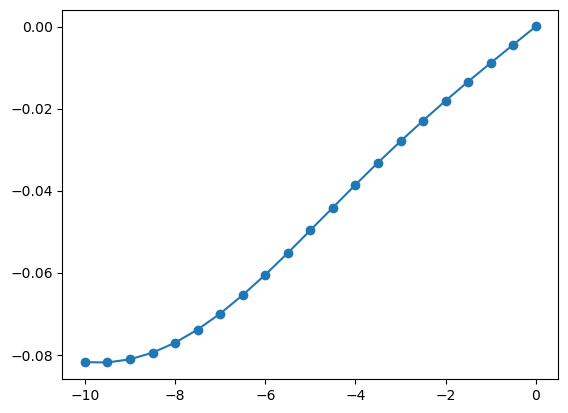

In [13]:
plt.plot(CC_pos, MC_volt.real,'o-',label="Upper outer coil")
plt.show()

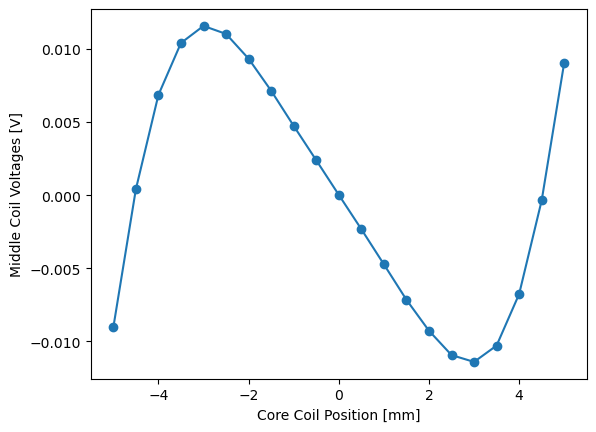

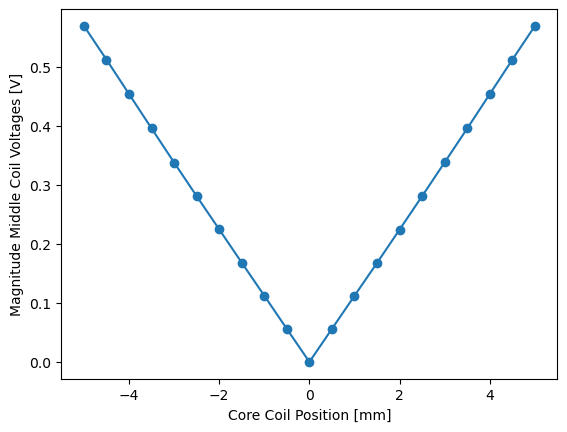

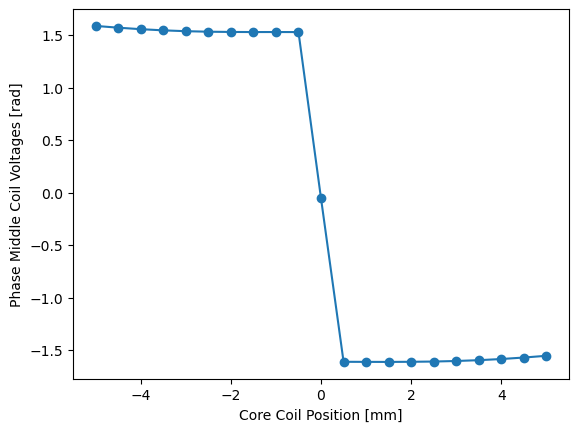

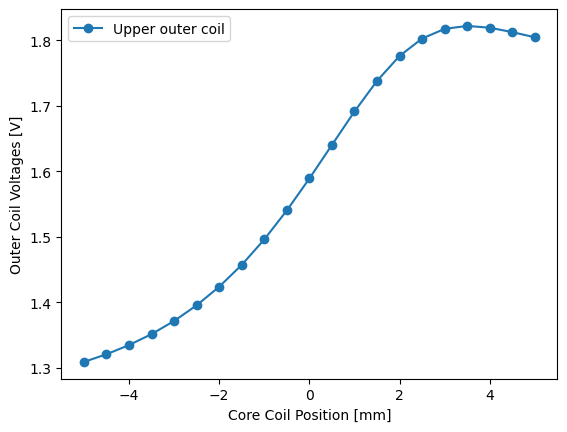

In [12]:
plt.plot(CC_pos, MC_volt.real,'o-',label="Middle coil")
plt.ylabel('Middle Coil Voltages [V]')
plt.xlabel('Core Coil Position [mm]')
plt.show()

plt.plot(CC_pos, abs(MC_volt),'o-')
plt.ylabel('Magnitude Middle Coil Voltages [V]')
plt.xlabel('Core Coil Position [mm]')
plt.show()

plt.plot(CC_pos, np.angle(MC_volt),'o-')
plt.ylabel('Phase Middle Coil Voltages [rad]')
plt.xlabel('Core Coil Position [mm]')
plt.show()


# plot the outercoil result
plt.plot(CC_pos, OC_upp_volt.real,'o-',label="Upper outer coil")
# plt.plot(CC_pos, OC_low_volt.real,'o-',label="Lower outer coil")
plt.ylabel('Outer Coil Voltages [V]')
plt.xlabel('Core Coil Position [mm]')
plt.legend()
plt.show()